In [5]:
from sklearn.model_selection import train_test_split # Attention: changed import!
%matplotlib inline

import seaborn as sns
iris = sns.load_dataset('iris');
X_iris = iris.drop('species', axis = 1)
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1);

print('Shape of X_iris: {}, shape of Xtrain: {}, shape of Xtest: {}.'.format(
    X_iris.shape, Xtrain.shape, Xtest.shape))

Shape of X_iris: (150, 4), shape of Xtrain: (112, 4), shape of Xtest: (38, 4).


In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

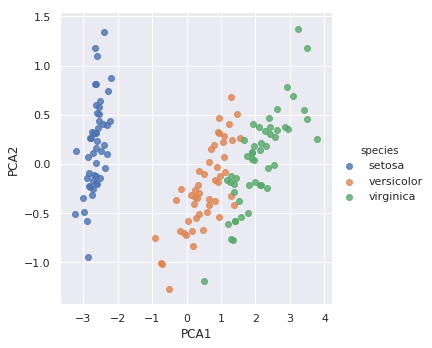

In [11]:
# Unsupervised learning (PCA)

from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.set()
sns.lmplot("PCA1", "PCA2", hue = 'species', data = iris, fit_reg = False);

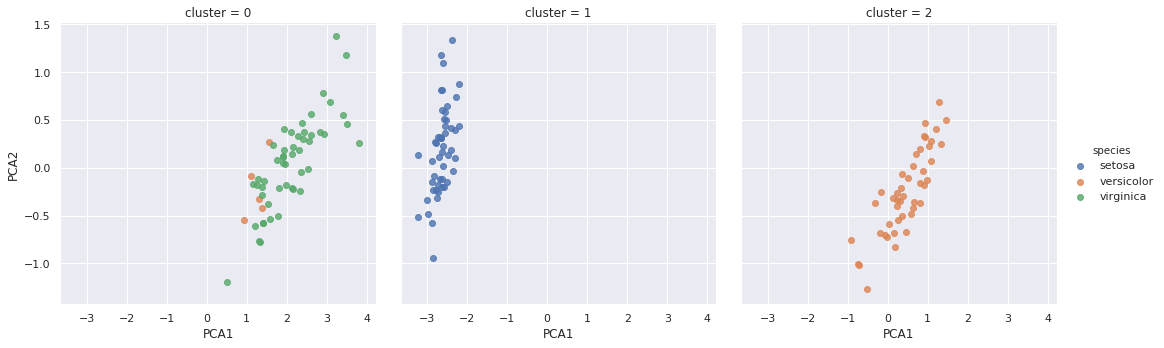

In [15]:
# Unsupervised learning (Gaussian Mixtures)
from sklearn.mixture import GaussianMixture # Attention: changed API
model = GaussianMixture(n_components = 3, covariance_type = 'full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data = iris, hue = 'species', fit_reg = False,
          col = 'cluster');